# POSE-ID-on

In this notebook two analyses will be performed:

- Analysis of the effect of random noise on the two methods
- Analysis of the reconstruction error from the poses generated from clustering centroids

# Libraries

In [3]:
import time
import os
import json
from tqdm import tqdm
import numpy as np
import pickle

import utils.Noise
from utils.Noise import *
from utils.data_viz import *
from clustering.clustering_and_reconstruction import *
from methods.Second_method import *

## Path definition

In this section we define the path from which the images and the joints are loaded. 

Moreover, we define the path in which the results of the comparisons are stored.

In [4]:
dir_joints = 'Joints_semidef'
dir_im = 'Immagini_semidef'

save_path = os.path.join(os.getcwd(), 'best_worst_cases')
if not os.path.exists(save_path):
    os.makedirs(save_path)

## Loading poses

The poses are loaded from the path defined. The convention of the file names are the OpenPose one. 
See the *load_poses* functions for more information.

In [ ]:
start = time.time()

dict_joints, dict_joints_SR_destrorso = load_poses(dir_im, dir_joints)

end = time.time()
print()
print(len(dict_joints), " poses were found and correctly loaded in ", round(end-start, 1), 'second')

# 1. Noise

In this section, Gaussian noise (for different value of standard deviation) is added to the desired pose/statue, to see the effect on the Matching methods.

### Uploading results for noise analysis

The method to test must be selected. 

To evaluate the impact of Gaussian noise, the results of the comparison must be uploaded from the respective .txt file.

In [6]:
best_worst_cases = {}
with open (os.path.join(save_path, 'best_worst_cases_1.txt'), 'rb') as fp:
  best_worst_cases = pickle.load(fp)

### Noise analysis

In [7]:
pose_id = 84 # Insert pose id
pose_name = list(dict_joints_SR_destrorso.keys())[pose_id]

N = Noises(dict_joints_SR_destrorso, pose_name, method = 1)
N.sigma_range = np.logspace(-3, 0, 100)
losses_sigma = N.calc_losses_sigma()
position, num_position = N.print_position()

In the following plot, we can see how the difference score between the noisy pose and the true one increases with the standard deviation of the Gaussian noise. The red line represents the difference score of the fourth most similar pose to the query

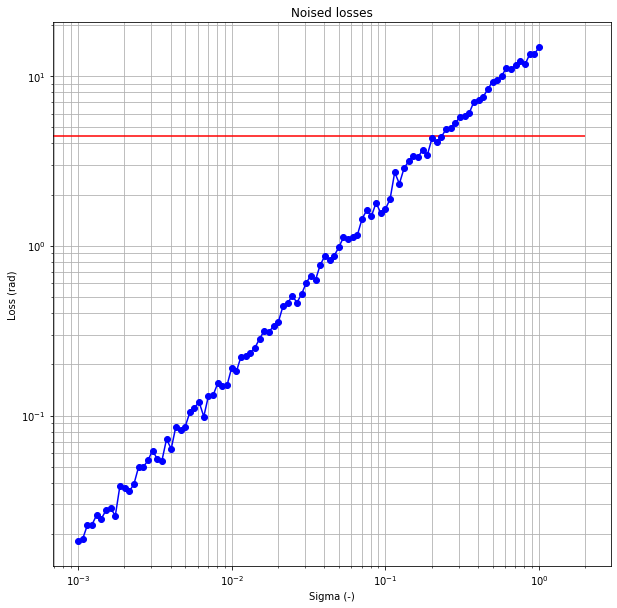

In [9]:
bwc = best_worst_cases[pose_id][0][4][1]
sigma_range = np.logspace(-3,0,100)
graph_losses(losses_sigma, bwc, sigma_range)

In the following plot, we can see how the position of the noisy pose (within the dataset, ordered according to the similarity to the query pose) varies with the standard deviation of the Gaussian noise. The red line represents the fifth position.

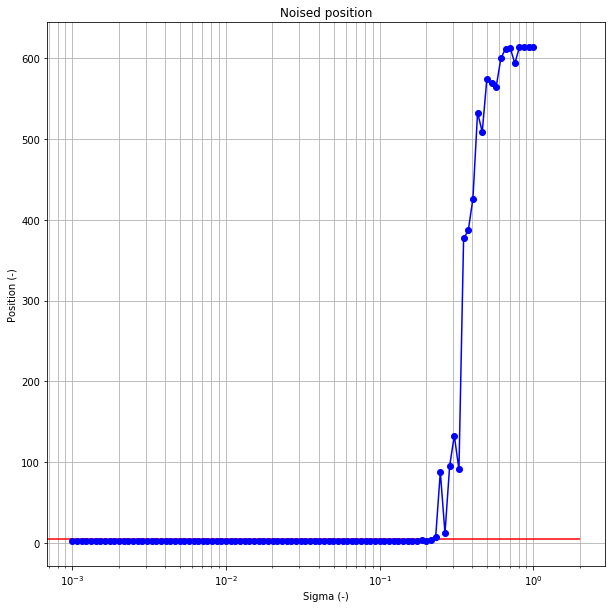

In [10]:
max_position = 5
sigma_range = np.logspace(-3,0,100)
graph_position(num_position, max_position, sigma_range)

### Visualize the noisy pose

With this simple function, the statue is shown, together with its pose and the noisy joints (generated based on a given value of standard deviation).

1544scala_rendered.png


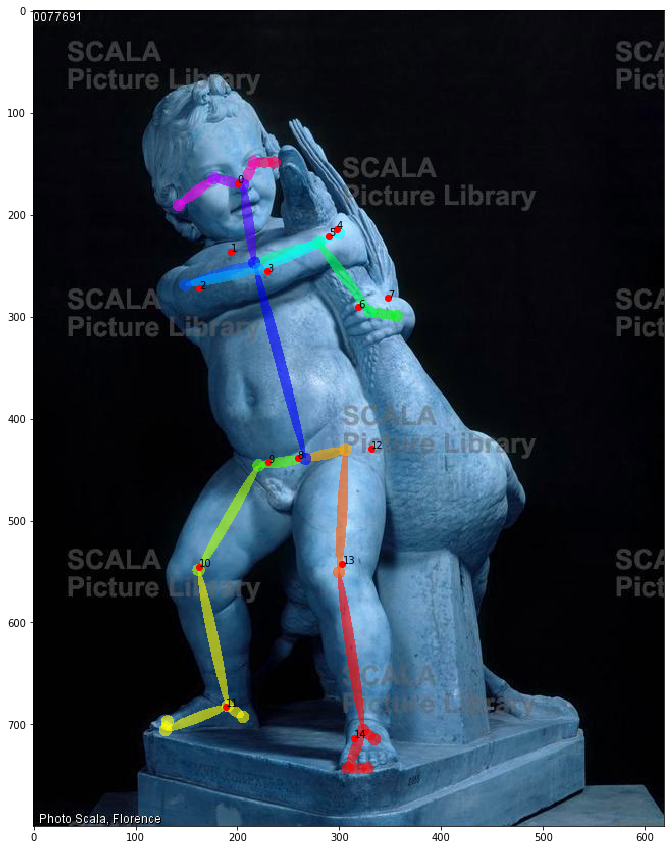

In [12]:
N = Noises(dict_joints, pose_name, method = 1)
noised_pose = N.make_noised_poses(sigma = 0.1)[3]
show_single_pose(pose_id, noised_pose, dict_joints, dir_im)

# 2. Reconstruction error

In this section, we evaluate the mean error (in degrees) of the poses reconstructed from the clustering centroids. The error is linked to the difference between the centroid values and the feature vector obtained by the respective reconstructed pose.

In [13]:
n_clusters = 9 #insert the number of desired clusters

In [14]:
MRE, list_errors = mean_reconstruction_error(n_clusters, dict_joints_SR_destrorso)

Mean reconstruction error = 2.5664386776473953°
